In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
62,853,286,254,6,801,818,973,3277,313,1576,2241,7,54,1465,12924.0
63,885,286,255,6,804,828,1001,3333,317,1628,2274,7,54,1471,13149.0
64,895,286,255,6,810,828,1035,3367,317,1635,2324,7,54,1486,13305.0
65,904,286,255,6,811,828,1050,3449,320,1660,2359,7,54,1497,13486.0
66,912,292,255,6,813,839,1078,3479,322,1693,2380,7,54,1497,13627.0
67,925,294,255,6,813,856,1102,3510,324,1715,2397,7,54,1505,13763.0
68,946,297,254,6,816,859,1123,3579,324,1721,2428,7,54,1515,13929.0
69,952,298,255,6,823,863,1142,3628,328,1762,2459,7,54,1540,14117.0
70,964,304,255,6,824,867,1152,3663,331,1781,2497,7,54,1555,14260.0
71,966,310,257,6,824,871,1181,3707,331,1812,2539,7,54,1582,14447.0


In [6]:
current_day = df_cases.index[-1]
print("### Time Since Last Doubling ###")
for col in df_cases.columns:
    time_at_half = df_cases[df_cases[col] < (df_cases[col].iloc[-1]/2)].index[-1]
    time_since_doubling = current_day - time_at_half
    
    print(f'{col} : {time_since_doubling} days')

### Time Since Last Doubling ###
Ayrshire and Arran : 36 days
Borders : 43 days
Dumfries and Galloway : 47 days
Eileanan Siar (Western Isles) : 51 days
Fife : 37 days
Forth Valley : 34 days
Grampian : 28 days
Greater Glasgow and Clyde : 34 days
Highland : 38 days
Lanarkshire : 34 days
Lothian : 33 days
Orkney : 48 days
Shetland : 55 days
Tayside : 38 days
Scotland (Total) : 34 days


In [7]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
67,75570,13763,1912
68,77750,13929,1973
69,80275,14117,2007
70,82266,14260,2053
71,85604,14447,2094
72,87660,14537,2103
73,88940,14594,2105
74,90421,14655,2134
75,92594,14751,2184
76,95173,14856,2221


## National Statistics

### total number of cases over time

In [8]:
roll = 7

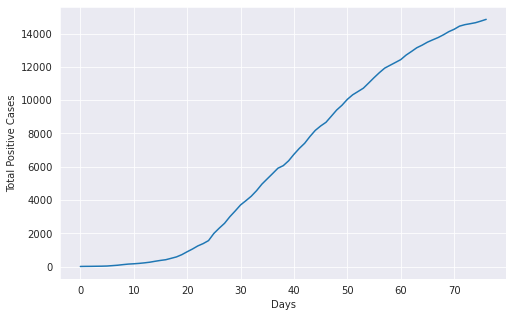

In [9]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

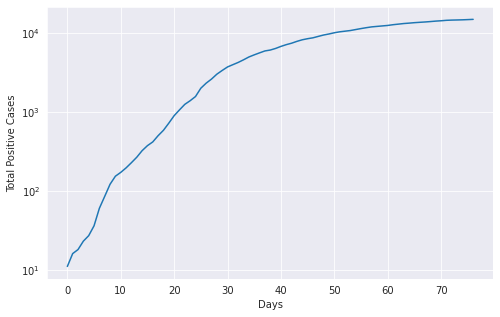

In [10]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

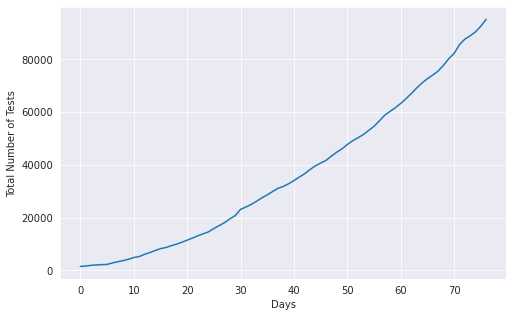

In [11]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [12]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

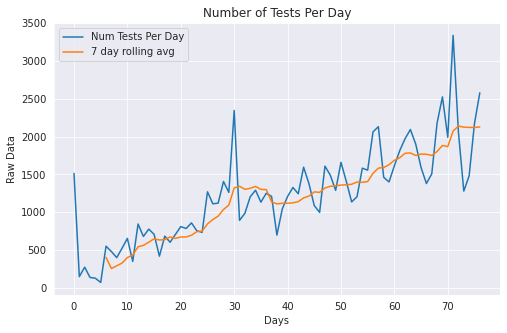

In [13]:
num_test_per_day.plot(figsize=(8, 5), label='Num Tests Per Day')
num_test_per_day.rolling(roll).mean().dropna().plot(label='7 day rolling avg')
plt.title('Number of Tests Per Day')
plt.ylabel('Raw Data')
plt.xlabel('Days')
plt.legend()
plt.show()

### Total number of deaths over time

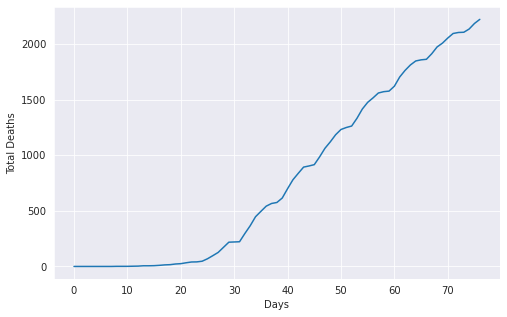

In [14]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

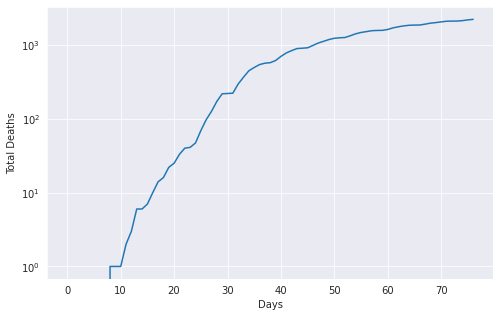

In [15]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

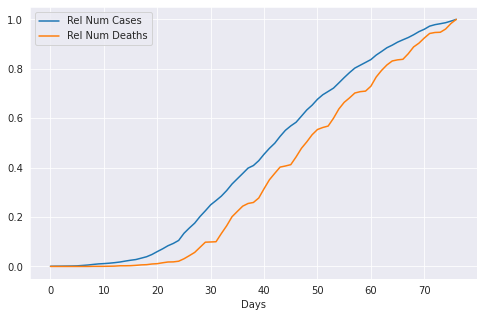

In [16]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

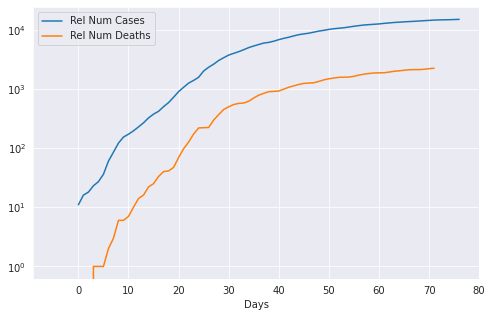

In [17]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day change in number of cases?

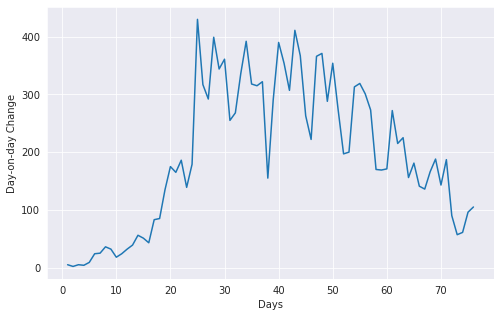

In [18]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Change')
plt.xlabel('Days')
plt.show()

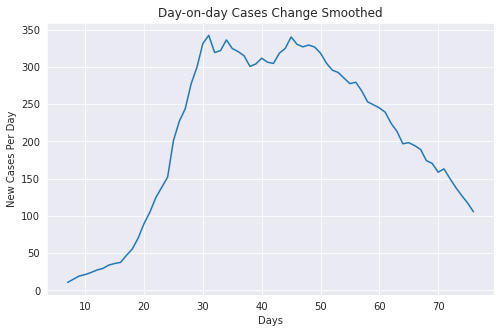

In [19]:
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(figsize=(8, 5))
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change Smoothed')
plt.show()

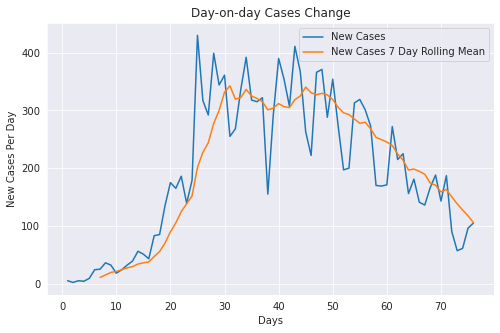

In [20]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5), label='New Cases')
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(label='New Cases 7 Day Rolling Mean')
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change')
plt.legend()
plt.show()

### What is the day-on-day percentage rise in cases?

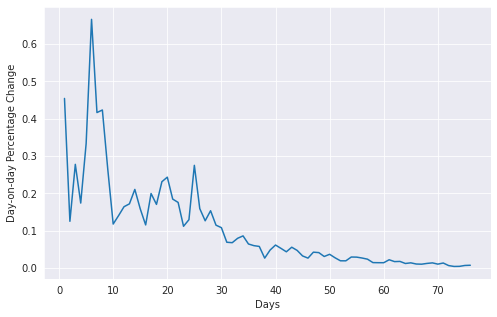

In [21]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

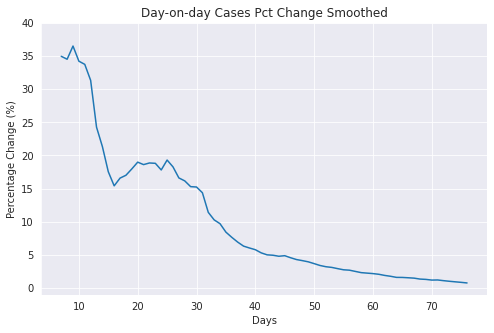

In [22]:
df_total['Total Positive Cases'].pct_change().rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [23]:
df_total['Total Positive Cases'].pct_change()[-7:]

70    0.010130
71    0.013114
72    0.006230
73    0.003921
74    0.004180
75    0.006551
76    0.007118
Name: Total Positive Cases, dtype: float64

In [24]:
df_total['Total Positive Cases'].pct_change().describe()

count    76.000000
mean      0.105475
std       0.123378
min       0.003921
25%       0.019064
50%       0.056538
75%       0.158553
max       0.666667
Name: Total Positive Cases, dtype: float64

In [25]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
67,0.014254,0.006849,0.000000,0.0,0.000000,0.020262,0.022263,0.008911,0.006211,0.012995,0.007143,0.0,0.0,0.005344,0.009980
68,0.022703,0.010204,-0.003922,0.0,0.003690,0.003505,0.019056,0.019658,0.000000,0.003499,0.012933,0.0,0.0,0.006645,0.012061
69,0.006342,0.003367,0.003937,0.0,0.008578,0.004657,0.016919,0.013691,0.012346,0.023823,0.012768,0.0,0.0,0.016502,0.013497
70,0.012605,0.020134,0.000000,0.0,0.001215,0.004635,0.008757,0.009647,0.009146,0.010783,0.015453,0.0,0.0,0.009740,0.010130
71,0.002075,0.019737,0.007843,0.0,0.000000,0.004614,0.025174,0.012012,0.000000,0.017406,0.016820,0.0,0.0,0.017363,0.013114
72,0.008282,0.009677,0.000000,0.0,0.000000,0.002296,0.006774,0.006474,0.000000,0.008830,0.008665,0.0,0.0,0.004425,0.006230
73,0.002053,0.009585,0.000000,0.0,0.000000,0.008018,0.009251,0.002948,0.000000,0.006565,0.002733,0.0,0.0,0.002517,0.003921
74,0.005123,0.003165,0.000000,0.0,0.001214,0.003409,0.005000,0.004543,0.006042,0.007065,0.002726,0.0,0.0,0.003766,0.004180
75,0.006116,0.015773,0.000000,0.0,0.001212,0.012458,0.008292,0.005587,0.003003,0.007555,0.003495,0.0,0.0,0.011257,0.006551
76,0.008105,0.000000,0.000000,0.0,0.000000,0.002237,0.001645,0.006878,0.000000,0.013390,0.010449,0.0,0.0,0.009276,0.007118


In [26]:
df_cases.pct_change().rolling(roll).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
67,0.016529,0.004980,0.000562,0.0,0.005211,0.009375,0.022073,0.019383,0.007736,0.017427,0.015741,0.0,0.0,0.007440,0.014586
68,0.016136,0.005934,0.000002,0.0,0.004280,0.008629,0.023134,0.016002,0.006340,0.015953,0.014198,0.0,0.0,0.006789,0.013184
69,0.015860,0.005914,0.000565,0.0,0.003882,0.007705,0.023163,0.014657,0.006721,0.016112,0.013360,0.0,0.0,0.007169,0.012696
70,0.012301,0.008791,0.000002,0.0,0.003521,0.006620,0.020303,0.013594,0.006202,0.012939,0.013464,0.0,0.0,0.007976,0.011656
71,0.010984,0.011610,0.001123,0.0,0.002455,0.007280,0.019047,0.013853,0.006202,0.014811,0.012726,0.0,0.0,0.008999,0.011834
72,0.010730,0.012993,0.001123,0.0,0.002279,0.007608,0.017944,0.011299,0.004850,0.013888,0.011812,0.0,0.0,0.008574,0.010781
73,0.009759,0.011365,0.001123,0.0,0.001926,0.006855,0.015456,0.010477,0.003958,0.011986,0.010931,0.0,0.0,0.008934,0.009847
74,0.008455,0.010838,0.001123,0.0,0.002100,0.004448,0.012990,0.009853,0.003933,0.011139,0.010300,0.0,0.0,0.008708,0.009019
75,0.006085,0.011634,0.001683,0.0,0.001746,0.005727,0.011452,0.007843,0.004362,0.011718,0.008951,0.0,0.0,0.009367,0.008232
76,0.006337,0.011153,0.001120,0.0,0.000520,0.005381,0.009270,0.006870,0.002599,0.010228,0.008620,0.0,0.0,0.008335,0.007320


### What is the day-on-day percentage rise in deaths?

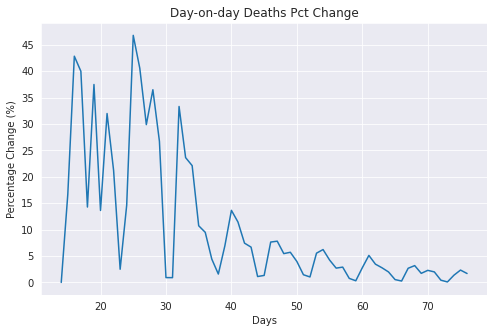

In [27]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

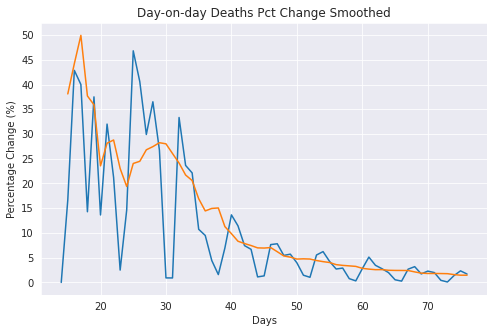

In [28]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.iloc[14:].mul(100).plot(figsize=(8,5))
death_pct_change.rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [29]:
death_pct_change[-10:]

67    0.026853
68    0.031904
69    0.017233
70    0.022920
71    0.019971
72    0.004298
73    0.000951
74    0.013777
75    0.023430
76    0.016941
Name: Total Deaths, dtype: float64

In [30]:
death_pct_change.describe()

count    69.000000
mean           inf
std            NaN
min       0.000000
25%       0.016941
50%       0.051235
75%       0.166667
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

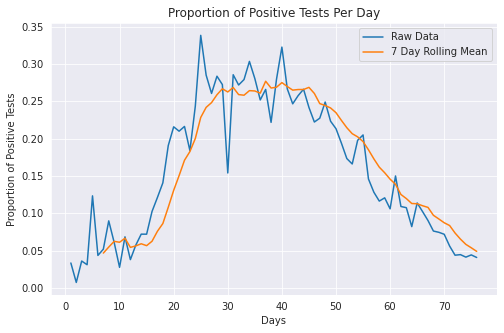

In [31]:
prop_pos = (df_total['Total Positive Cases'].diff() / df_total['Total Tests'].diff())

prop_pos.plot(figsize=(8, 5), label='Raw Data')
prop_pos.rolling(roll).mean().dropna().plot(label='7 Day Rolling Mean')
plt.title('Proportion of Positive Tests Per Day')
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.legend()
plt.show()

### What is the Day-on-day rise in deaths?

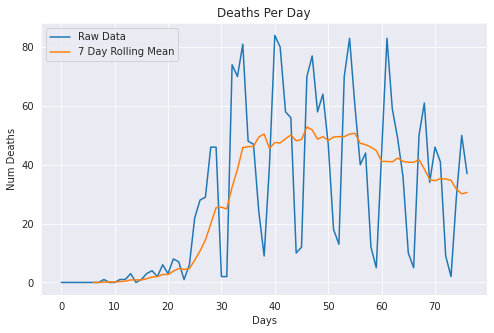

In [32]:
# remove first 13 points because they have nothing
death_per_day = df_total['Total Deaths'].diff().fillna(0)
death_per_day.plot(figsize=(8, 5), label='Raw Data')
death_per_day.rolling(roll).mean().plot(label='7 Day Rolling Mean')
plt.title('Deaths Per Day')
plt.ylabel('Num Deaths')
plt.xlabel('Days')
plt.legend()
plt.show()

## Regional Statistics

### Num Cases Per Region

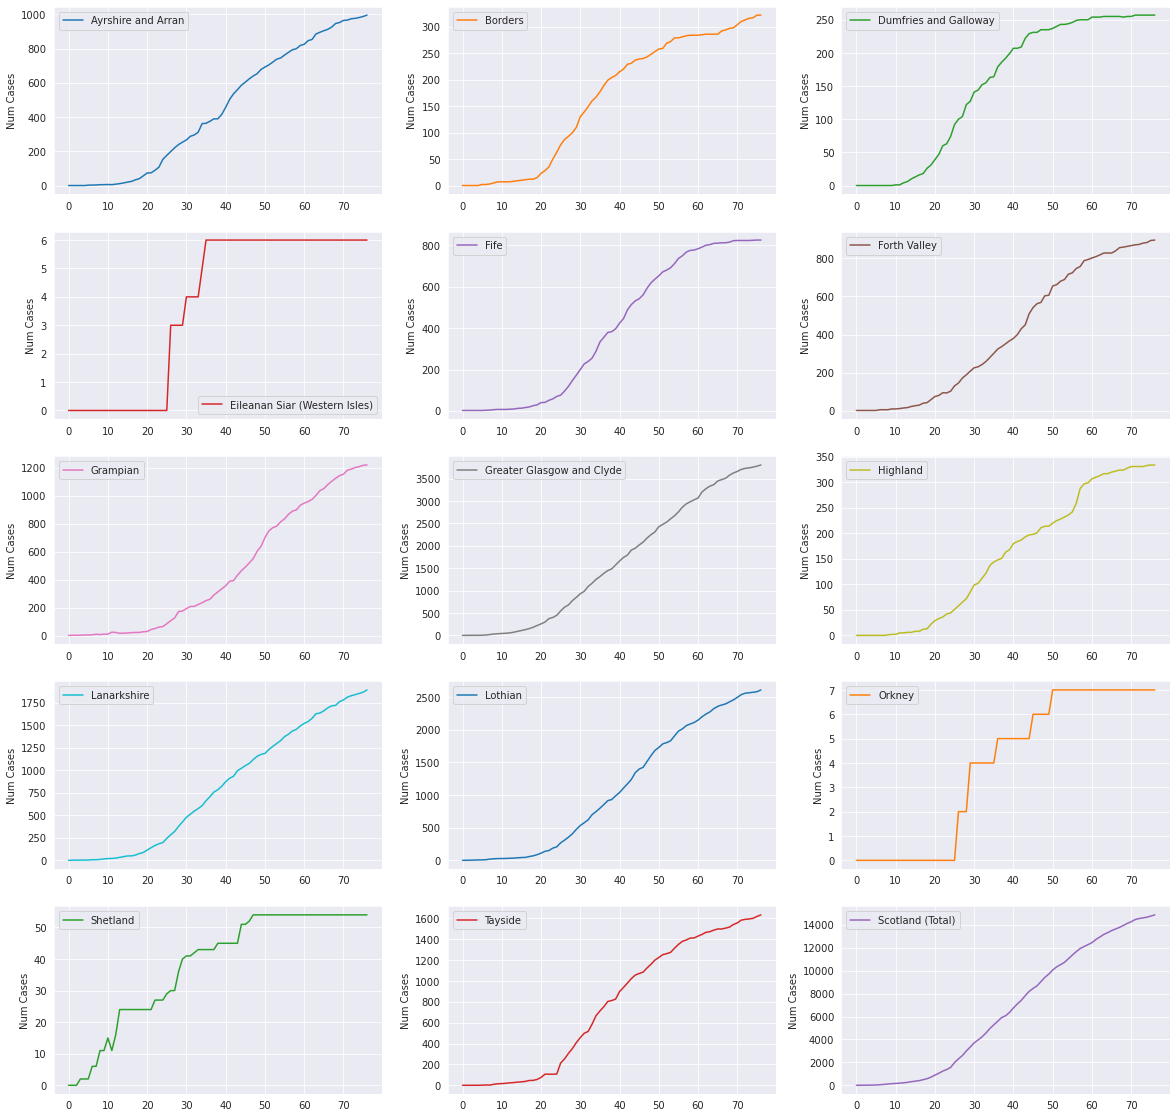

In [33]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

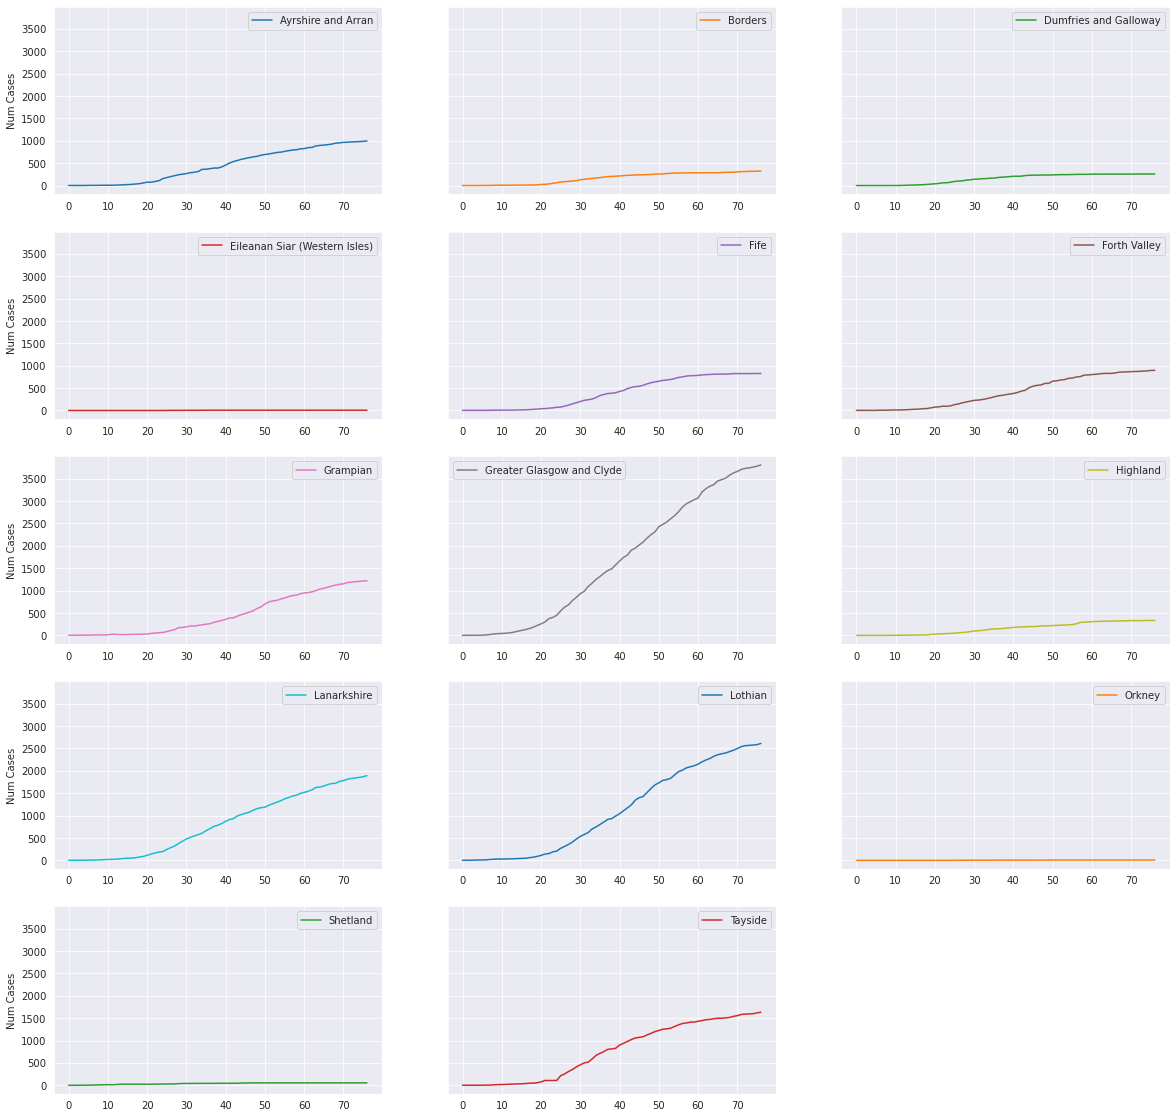

In [34]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [35]:
194 / 178

1.0898876404494382

In [36]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [37]:
df_cases_rel = df_cases / df_pop.values.T * 100000

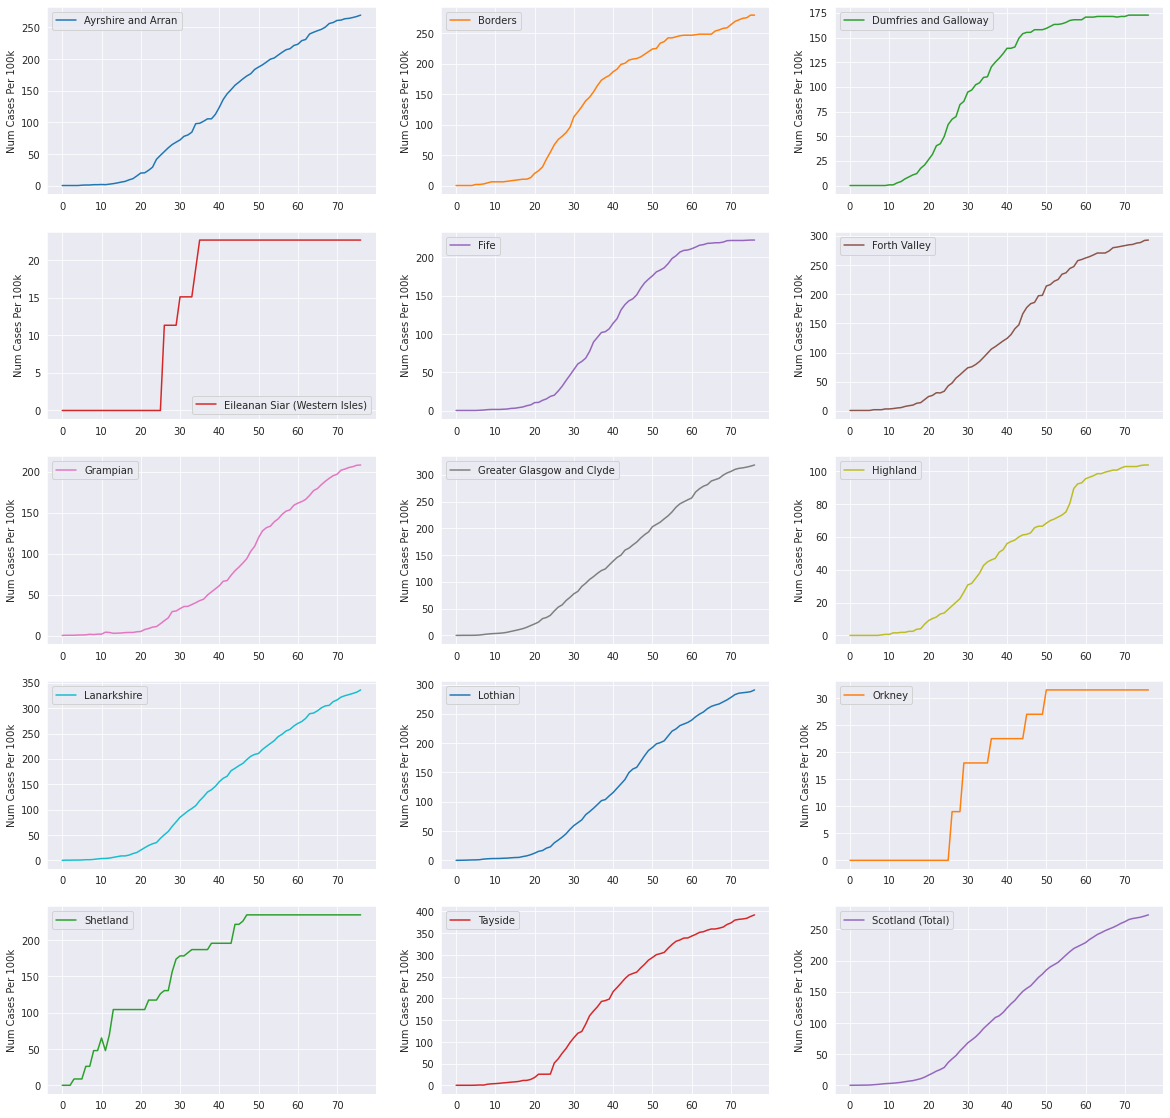

In [38]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

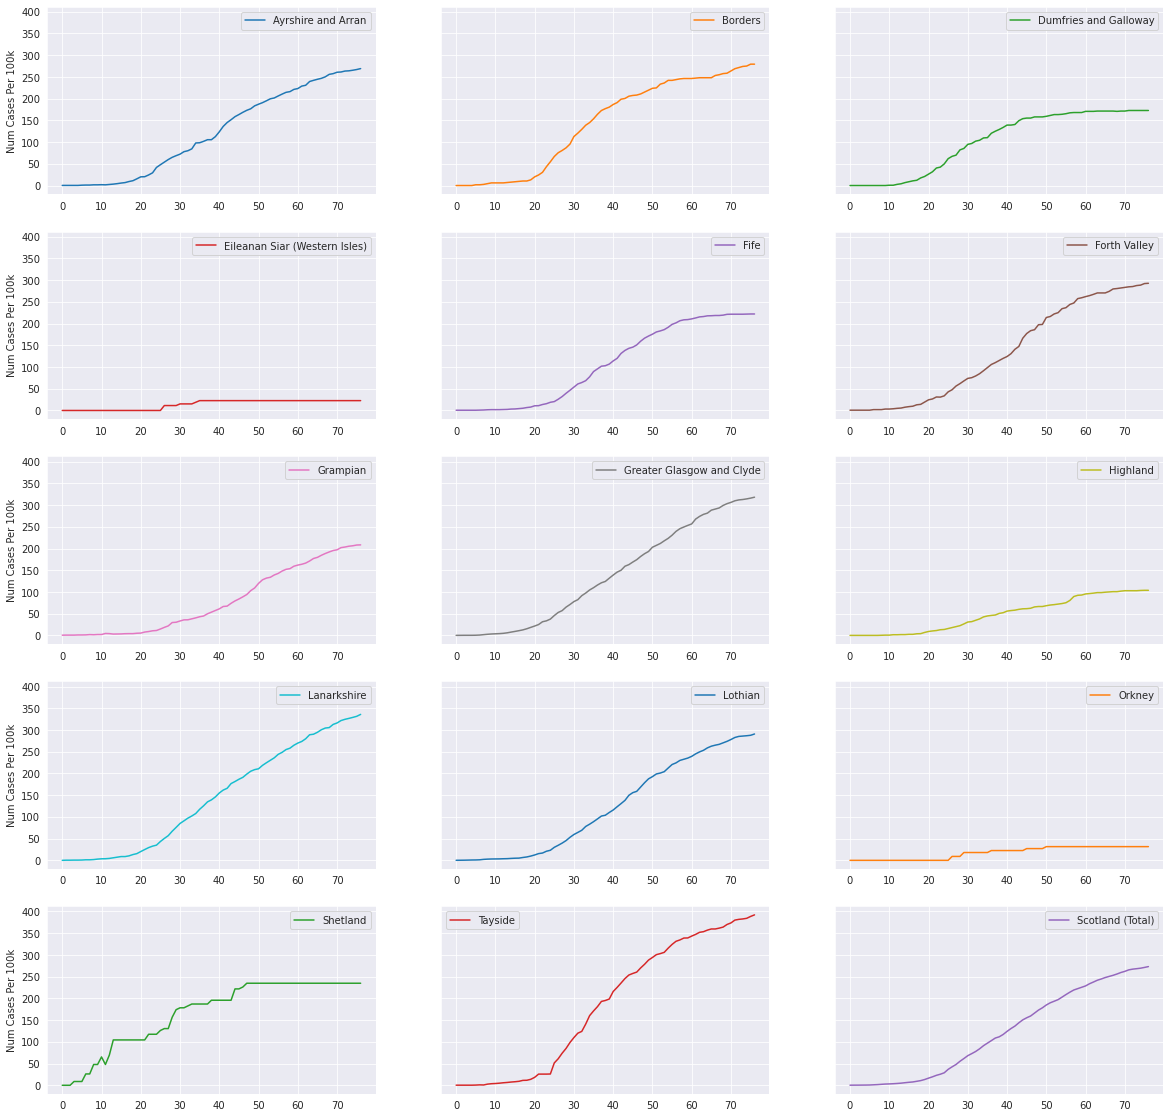

In [39]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

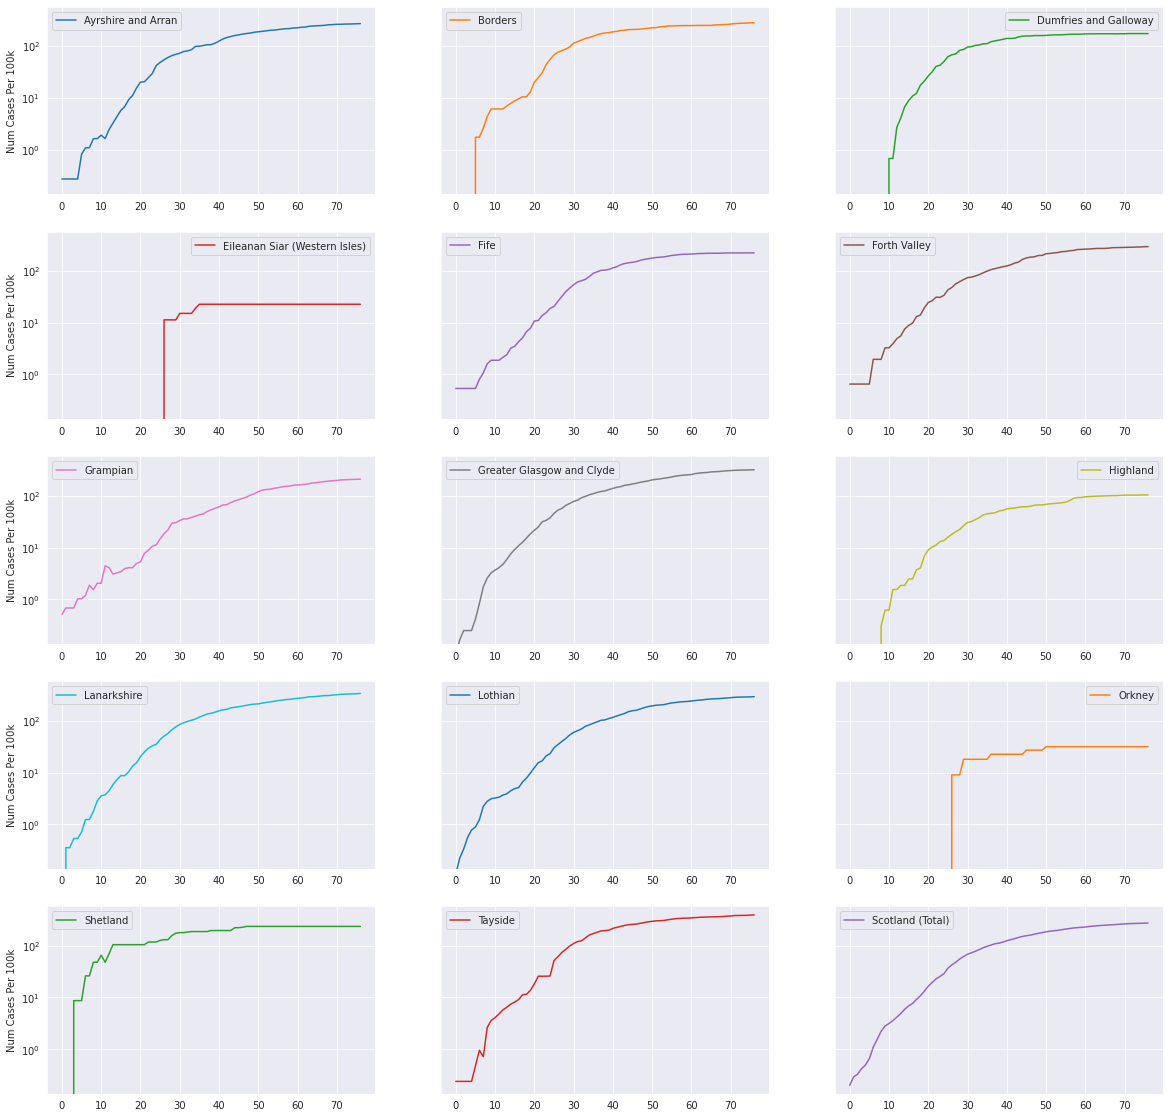

In [40]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

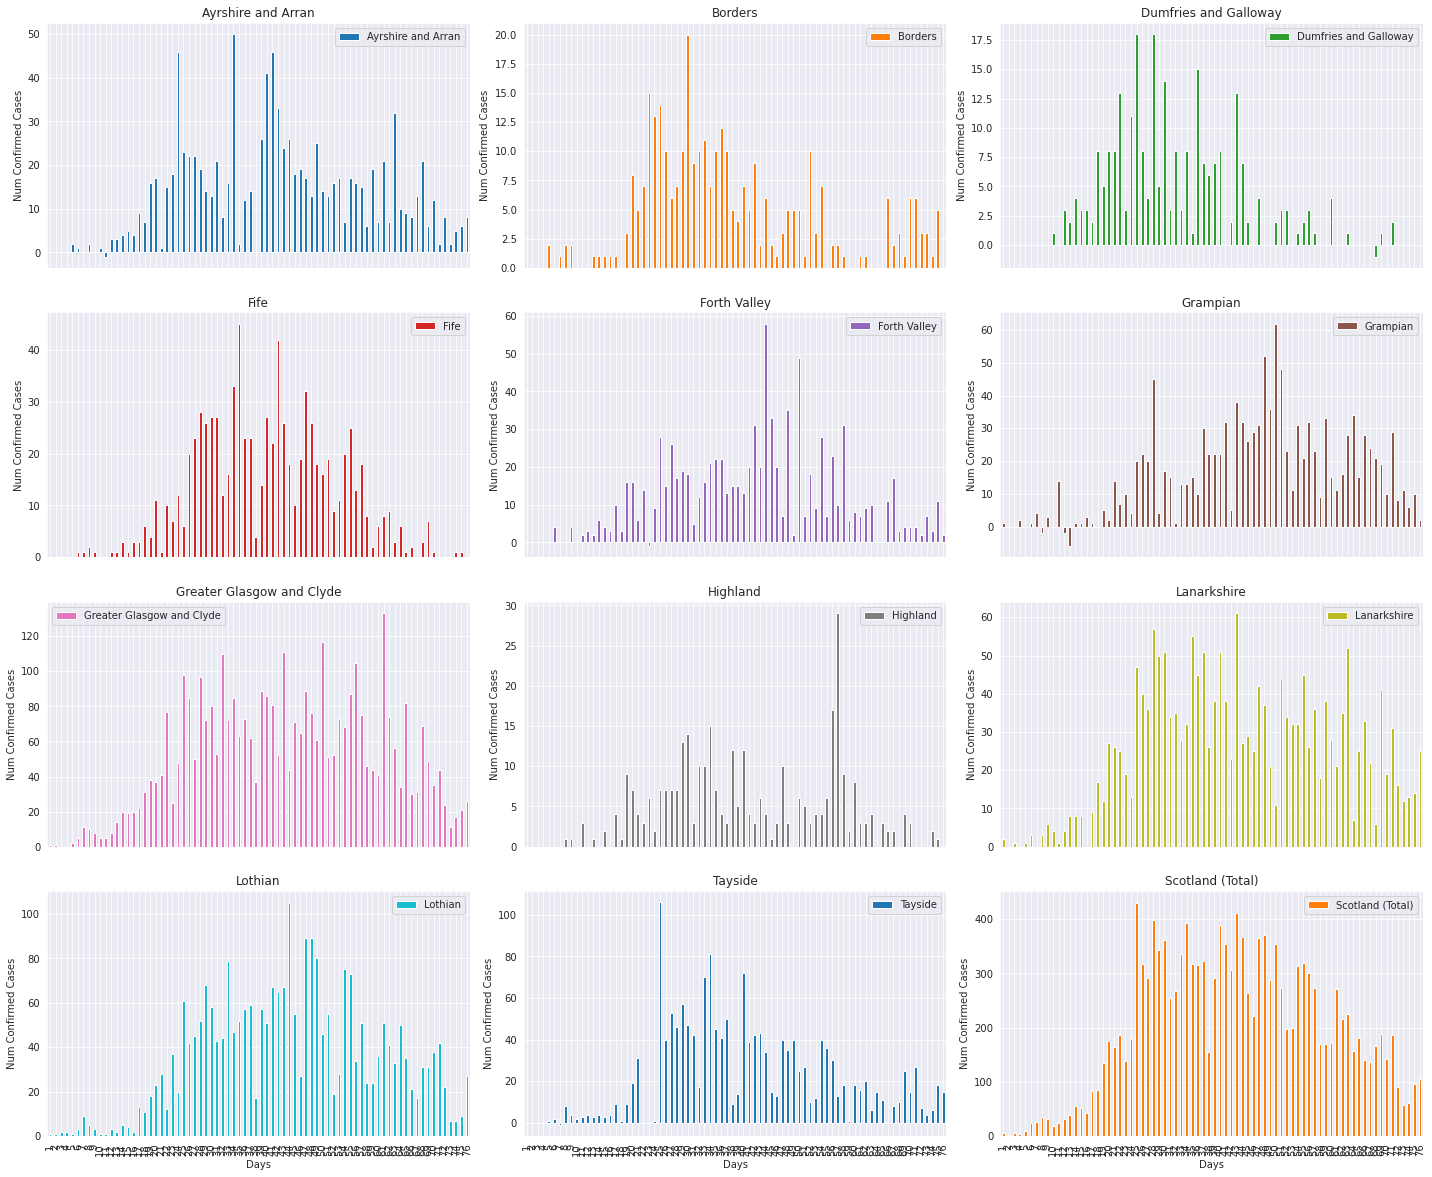

In [41]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

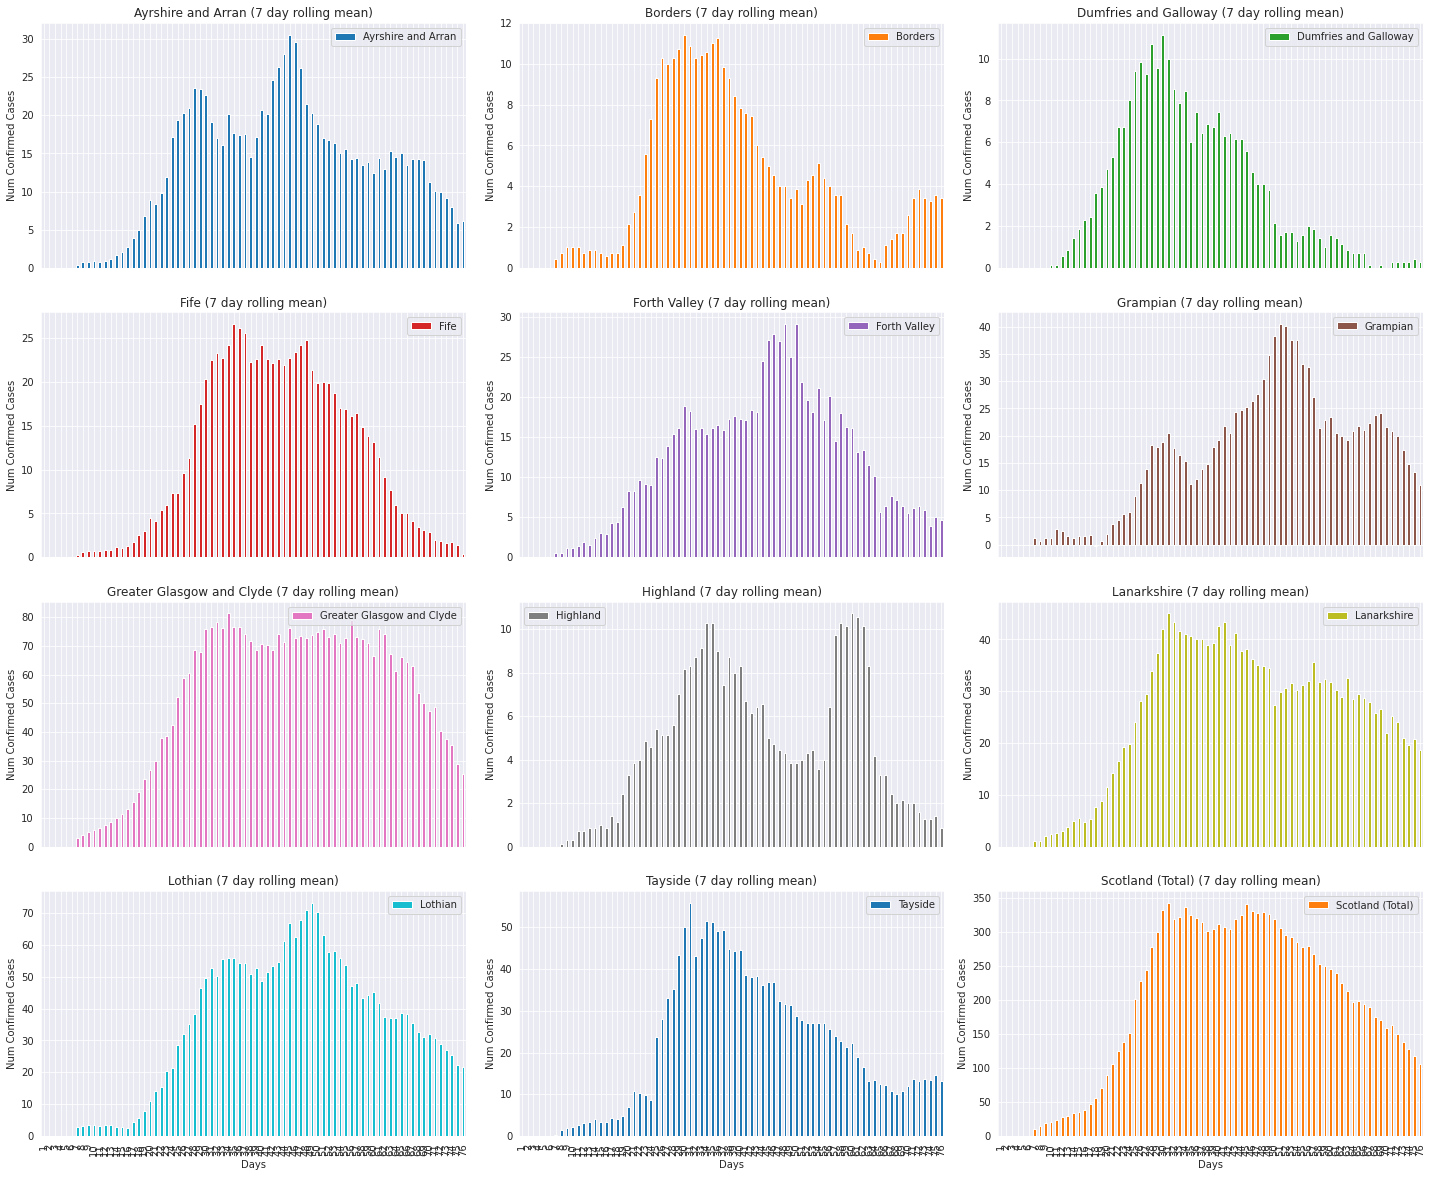

In [42]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(roll).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + f' ({roll} day rolling mean)')
plt.tight_layout()
plt.show()

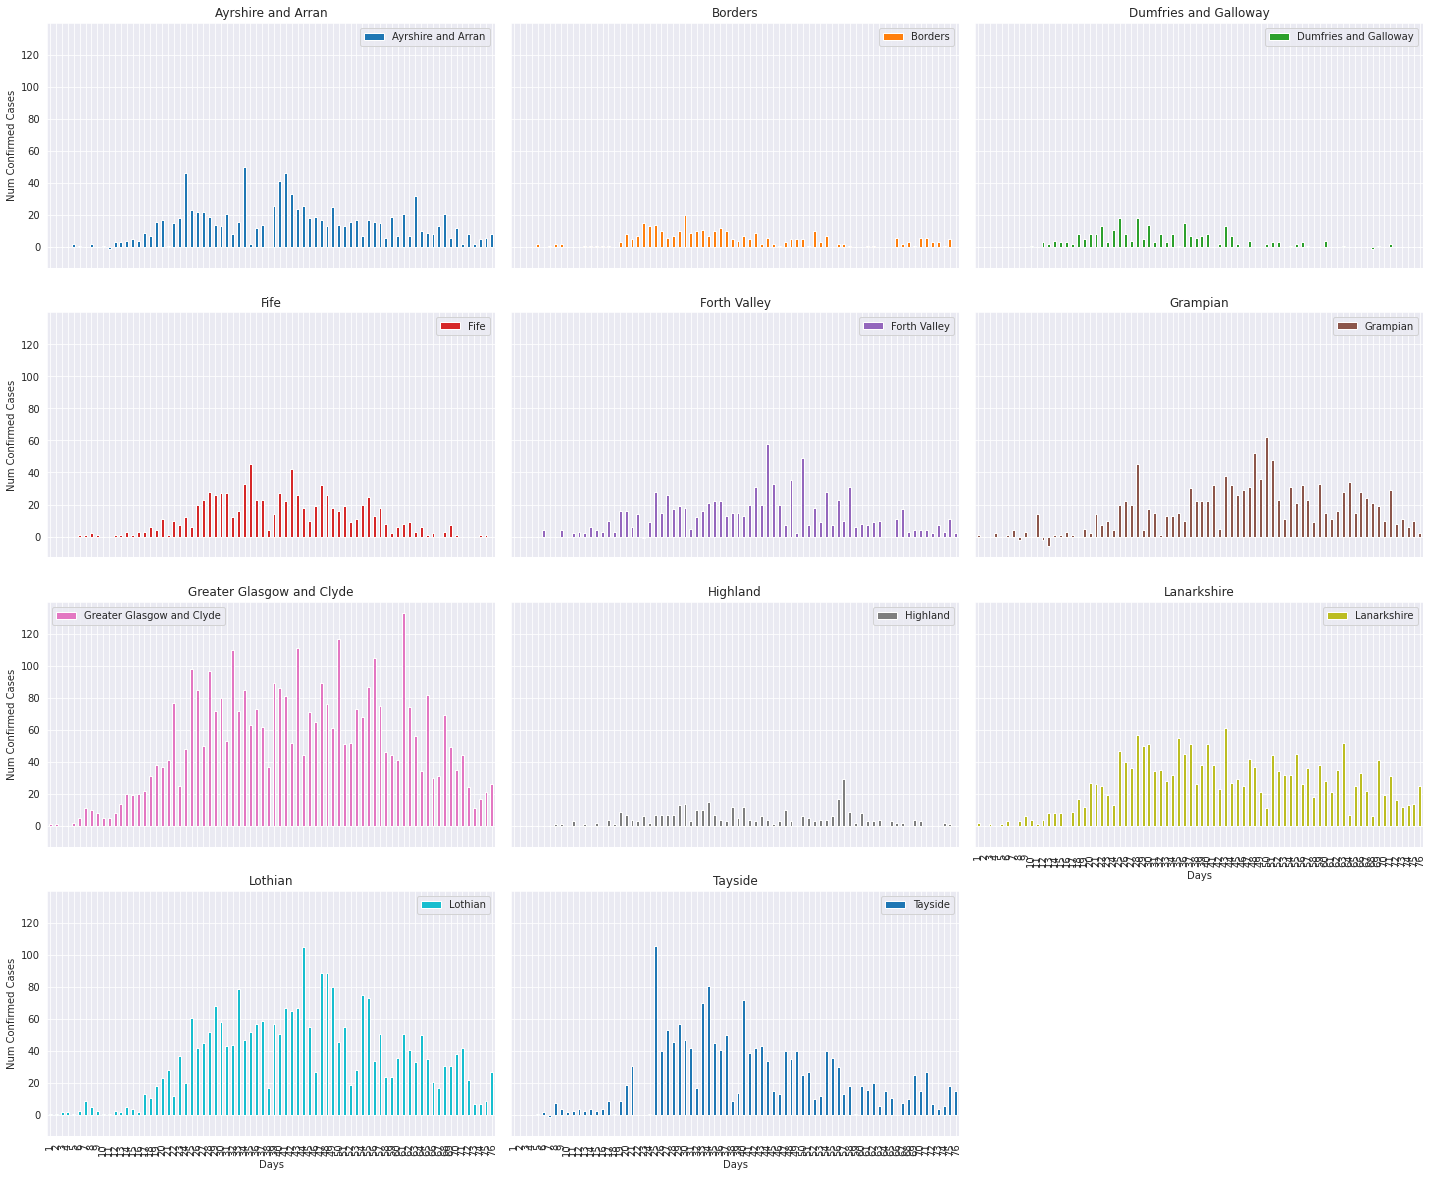

In [43]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [44]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

### Log Growth Curves for Each Region

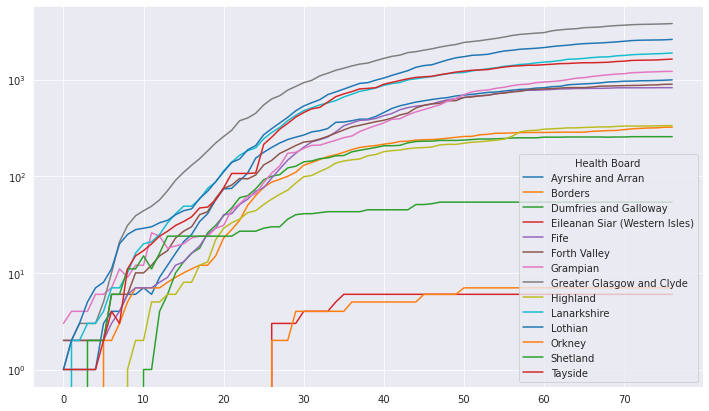

In [45]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

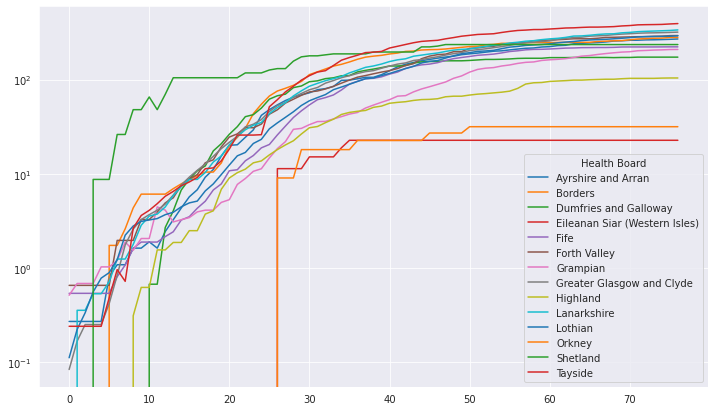

In [46]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()